In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
os.listdir('drive/MyDrive/TRI-NIT_hackathon')

FileNotFoundError: ignored

In [8]:
df = pd.read_csv("drive/MyDrive/TRI-NIT_hackathon/NIT Hackathon (1)/Crop_recommendation.csv")

FileNotFoundError: ignored

In [9]:
df = pd.read_csv("/content/drive/MyDrive/NIT Hackathon/Crop_recommendation.csv")

In [10]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [11]:
df.drop(labels='ph', axis=1, inplace=True)

In [12]:
len(df)

2200

In [13]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
rainfall       0
label          0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   rainfall     2200 non-null   float64
 6   label        2200 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 120.4+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,rainfall
count,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00
mean,50.55,53.36,48.15,25.62,71.48,103.46
std,36.92,32.99,50.65,5.06,22.26,54.96
min,0.00,5.00,5.00,8.83,14.26,20.21
25%,21.00,28.00,20.00,22.77,60.26,64.55
50%,37.00,51.00,32.00,25.60,80.47,94.87
75%,84.25,68.00,49.00,28.56,89.95,124.27
max,140.00,145.00,205.00,43.68,99.98,298.56


In [15]:
len(df['label'].unique())

22

In [16]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [17]:
df.groupby(by='label').size()

label
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
dtype: int64

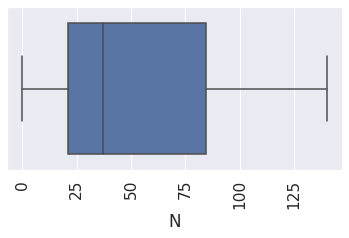

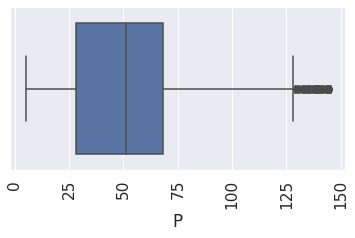

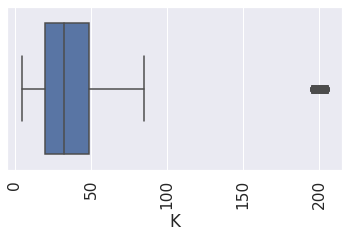

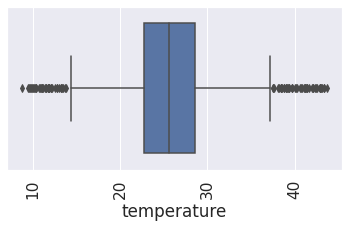

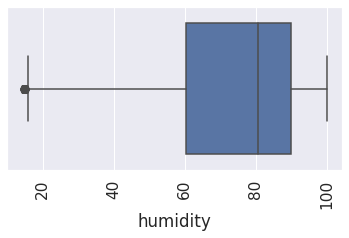

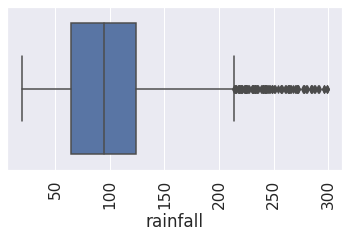

In [ ]:
df1 = df.drop(labels=['label'],axis=1)
for i in df1.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(df1[i])
    plt.xticks(rotation = 90)
    plt.show()

# With given NPK values

In [ ]:
from sklearn import preprocessing
from plotly.subplots import make_subplots
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import train_test_split

In [ ]:
#Data Pre-Processing
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])

df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [ ]:
features = df.columns[:-1]
X = df[features] 
y = df['label']

In [ ]:
X_train, X_val_, y_train, y_val_ = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_val_, y_val_, test_size = 0.5, random_state = 42)

In [ ]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X val :", X_val.shape)
print("Shape of the y val :", y_val.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (1540, 6)
Shape of the y Train : (1540,)
Shape of the X val : (330, 6)
Shape of the y val : (330,)
Shape of the X test : (330, 6)
Shape of the y test : (330,)


Importance of N is 634.109614
Importance of P is 1370.832913
Importance of K is 19278.607456
Importance of temperature is 65.061410
Importance of humidity is 2255.437627
Importance of rainfall is 478.509208


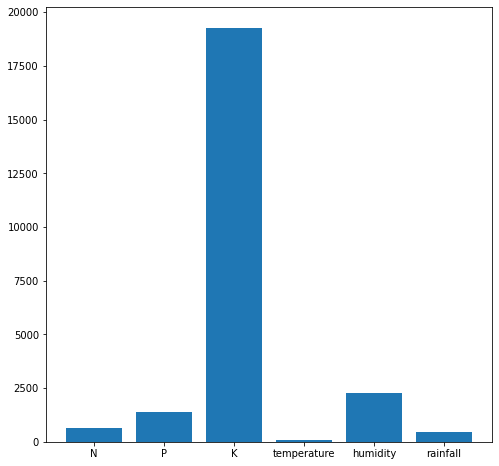

In [ ]:
import plotly.express as px
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from matplotlib import pyplot

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
feature_names=X.columns
for i in range(len(fs.scores_)):
	print('Importance of ' +feature_names[i]+' is %f' % (fs.scores_[i]))
# plot the scores
plt.rcParams["figure.figsize"] = (8,8)
pyplot.bar([i for i in X.columns], fs.scores_)
pyplot.show()

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import train_test_split

In [ ]:
#Modelling
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 29/29 [00:08<00:00,  3.23it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.99,0.99,None,0.99,0.02
QuadraticDiscriminantAnalysis,0.99,0.99,None,0.99,0.04
RandomForestClassifier,0.99,0.99,None,0.99,0.79
ExtraTreesClassifier,0.99,0.99,None,0.99,0.33
XGBClassifier,0.98,0.98,None,0.98,1.46
LGBMClassifier,0.98,0.98,None,0.98,2.99
BaggingClassifier,0.98,0.97,None,0.98,0.08
SVC,0.97,0.97,None,0.97,0.12
DecisionTreeClassifier,0.97,0.97,None,0.97,0.03


In [ ]:
#model = GaussianNB()

In [ ]:
from sklearn.ensemble import RandomForestClassifier  

classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred= classifier.predict(X_test)  

In [ ]:
X_test.iloc[:1]

,N,P,K,temperature,humidity,rainfall
1676,14,19,14,17.68,94.36,108.06


In [ ]:
predictions = classifier.predict_proba([[14,19,14,17.68,94.36,108.06]])
predictions

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0.9, 0. , 0. , 0.1, 0. , 0. ]])

In [ ]:
print(classification_report(np.array(y_test), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        12
           8       0.81      1.00      0.89        17
           9       1.00      1.00      1.00        22
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00        21
          13       1.00      0.93      0.96        14
          14       1.00      1.00      1.00        14
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00        12
          17       1.00    

In [ ]:
from sklearn import metrics  
print(metrics.accuracy_score(y_test, y_pred))

0.9848484848484849


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 22,  0,  0,

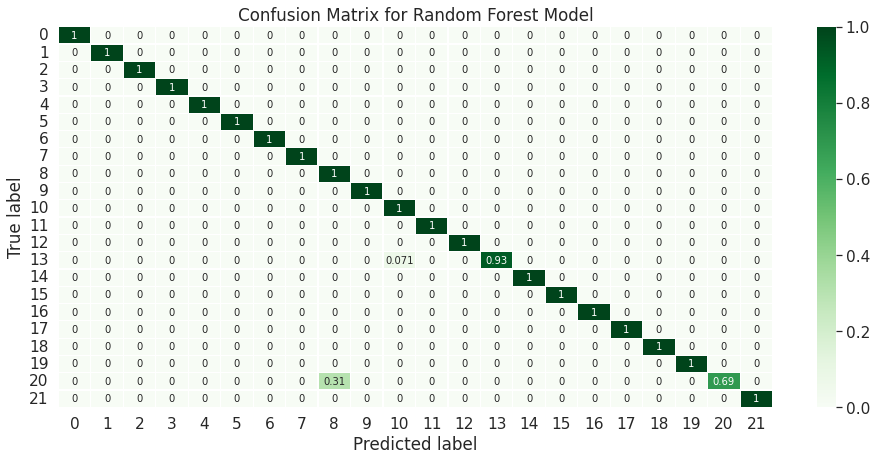

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
#class_names = list(df['label'])
#tick_marks = np.arange(len(class_names))
#tick_marks2 = tick_marks + 0.5
#plt.xticks(tick_marks, class_names, rotation=25)
#plt.yticks(tick_marks2, class_names, rotation=25)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(classifier, "./random_forest.joblib")

['./random_forest.joblib']

In [ ]:
'''
loaded_rf = joblib.load("./random_forest.joblib")
'''

'\nloaded_rf = joblib.load("./random_forest.joblib")\n'

# Without NPK values given

In [18]:
df.loc[:,'N':'K']=df.loc[:,'N':'K'].apply(lambda x: pd.qcut(x, q=[0, 0.25, 0.75, 1.0], 
                                    labels =['low','medium','high']) 
                                    if not x.nunique() == 1 else 'low')

In [19]:
df.head()

,N,P,K,temperature,humidity,rainfall,label
0,high,medium,medium,20.879744,82.002744,202.935536,rice
1,high,medium,medium,21.770462,80.319644,226.655537,rice
2,medium,medium,medium,23.004459,82.320763,263.964248,rice
3,medium,medium,medium,26.491096,80.158363,242.864034,rice
4,medium,medium,medium,20.130175,81.604873,262.717340,rice


In [20]:
from sklearn import preprocessing
from plotly.subplots import make_subplots
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import train_test_split

In [21]:
numeric_var = {'N': {'low':0, 'medium':1, 'high':2},'P':{'low':0, 'medium':1, 'high':2}, 'K': {'low':0, 'medium':1, 'high':2}}
df = df.replace(numeric_var)

In [22]:
df.head()

,N,P,K,temperature,humidity,rainfall,label
0,2,1,1,20.879744,82.002744,202.935536,rice
1,2,1,1,21.770462,80.319644,226.655537,rice
2,1,1,1,23.004459,82.320763,263.964248,rice
3,1,1,1,26.491096,80.158363,242.864034,rice
4,1,1,1,20.130175,81.604873,262.717340,rice


In [23]:
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])



{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [24]:
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [ ]:
features = df.columns[:-1]
X = df[features] 
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Importance of N is 148.578214
Importance of P is 326.443657
Importance of K is 211.318262
Importance of temperature is 71.098859
Importance of humidity is 2476.850437
Importance of rainfall is 502.347447


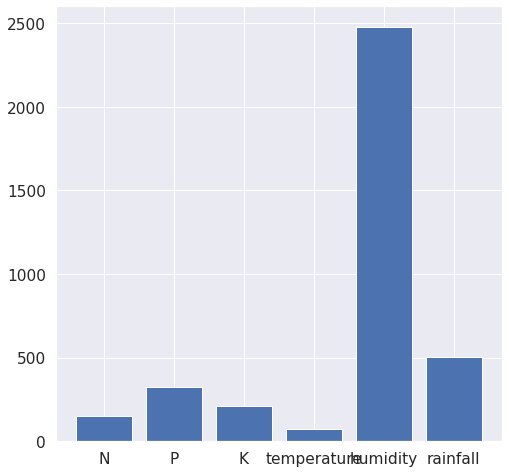

In [ ]:
import plotly.express as px
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from matplotlib import pyplot

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
feature_names=X.columns
for i in range(len(fs.scores_)):
	print('Importance of ' +feature_names[i]+' is %f' % (fs.scores_[i]))
# plot the scores
plt.rcParams["figure.figsize"] = (8,8)
pyplot.bar([i for i in X.columns], fs.scores_)
pyplot.show()

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import train_test_split

In [ ]:
#Modelling
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 29/29 [00:07<00:00,  3.76it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.97,0.97,None,0.97,0.32
LGBMClassifier,0.96,0.96,None,0.96,2.33
BaggingClassifier,0.95,0.96,None,0.95,0.11
ExtraTreesClassifier,0.95,0.95,None,0.95,0.28
XGBClassifier,0.95,0.95,None,0.95,1.28
DecisionTreeClassifier,0.94,0.95,None,0.94,0.03
LabelSpreading,0.93,0.94,None,0.93,0.26
LabelPropagation,0.93,0.93,None,0.93,0.16
SVC,0.92,0.92,None,0.92,0.10


In [ ]:
from sklearn.ensemble import RandomForestClassifier  

classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred= classifier.predict(X_test)  

In [ ]:
from sklearn import metrics  
print(metrics.accuracy_score(y_test, y_pred))

0.9563636363636364


In [ ]:
import pickle
# Dump the trained classifier with Pickle
RF_pkl_filename = '/content/drive/MyDrive/NIT Hackathon/Crop_RandomForest_soil.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(classifier, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [ ]:
import bz2
import pickle
import _pickle as cPickle